In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import gensim, logging
import pprint

In [2]:
def calculate_similarity(df, model, source_name, threshold=0):
    source_midi_names = df[df["midi_name"] == source_name]["midi_name"].values
    if (len(source_midi_names) == 0):
        print("Invalid source name")
        return

    source_midi_name = source_midi_names[0]

    target_midi_names = df["midi_name"].values
    if (len(target_midi_names) == 0):
        print("Invalid target prefix")
        return

    return_list = []

    data = calculate_similarity_aux(df, model, source_midi_name, target_midi_names, threshold)

    for each_data in data:
        return_list.append(each_data["score"])


    return return_list

In [3]:
def calculate_similarity_aux(df, model, source_name, target_names=[], threshold=0):
    source_harmo = df[df["midi_name"] == source_name]["harmonic_reduction"].values[0]
    source_vec = vectorize_harmony(model, source_harmo)
    results = []
    for name in target_names:
        target_harmo = df[df["midi_name"] == name]["harmonic_reduction"].values[0]
        if (len(target_harmo) == 0):
            continue

        target_vec = vectorize_harmony(model, target_harmo)
        sim_score = cosine_similarity(source_vec, target_vec)
        if sim_score > threshold:
            results.append({
                'score': sim_score,
                'name': name
            })

    # Sort results by score in desc order
    results.sort(key=lambda k: k['score'], reverse=True)
    return results

In [4]:
def vectorize_harmony(model, harmonic_reduction):
    # Gets the model vector values for each chord from the reduction.
    word_vecs = []
    for word in harmonic_reduction:
        try:
            vec = model.wv[word]
            word_vecs.append(vec)
        except KeyError:
            # Ignore, if the word doesn't exist in the vocabulary
            pass

    # Assuming that document vector is the mean of all the word vectors.
    return np.mean(word_vecs, axis=0)

In [5]:
def cosine_similarity(vecA, vecB):
    # Find the similarity between two vectors based on the dot product.
    csim = np.dot(vecA, vecB) / (np.linalg.norm(vecA) * np.linalg.norm(vecB))
    if np.isnan(np.sum(csim)):
        return 0

    return csim

<AxesSubplot: >

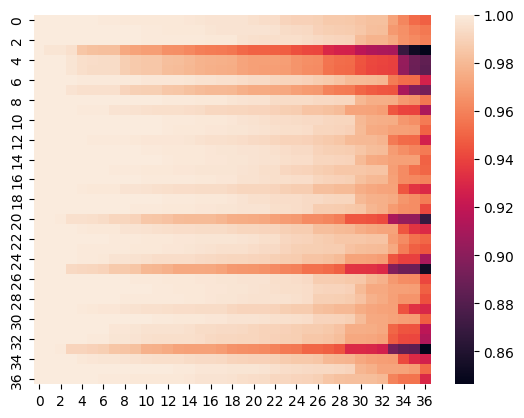

In [6]:
df = pd.read_csv("../file_name.csv", sep=",")

model = gensim.models.Word2Vec(df["harmonic_reduction"], min_count=2, window=4)


total_list = []

pp = pprint.PrettyPrinter(width=41, compact=True)
for midi in df["midi_name"]:

    total_list.append(calculate_similarity(df, model, midi))

sns.heatmap(total_list)

In [7]:
sns.set(rc = {'figure.figsize':(12,12)})

<AxesSubplot: >

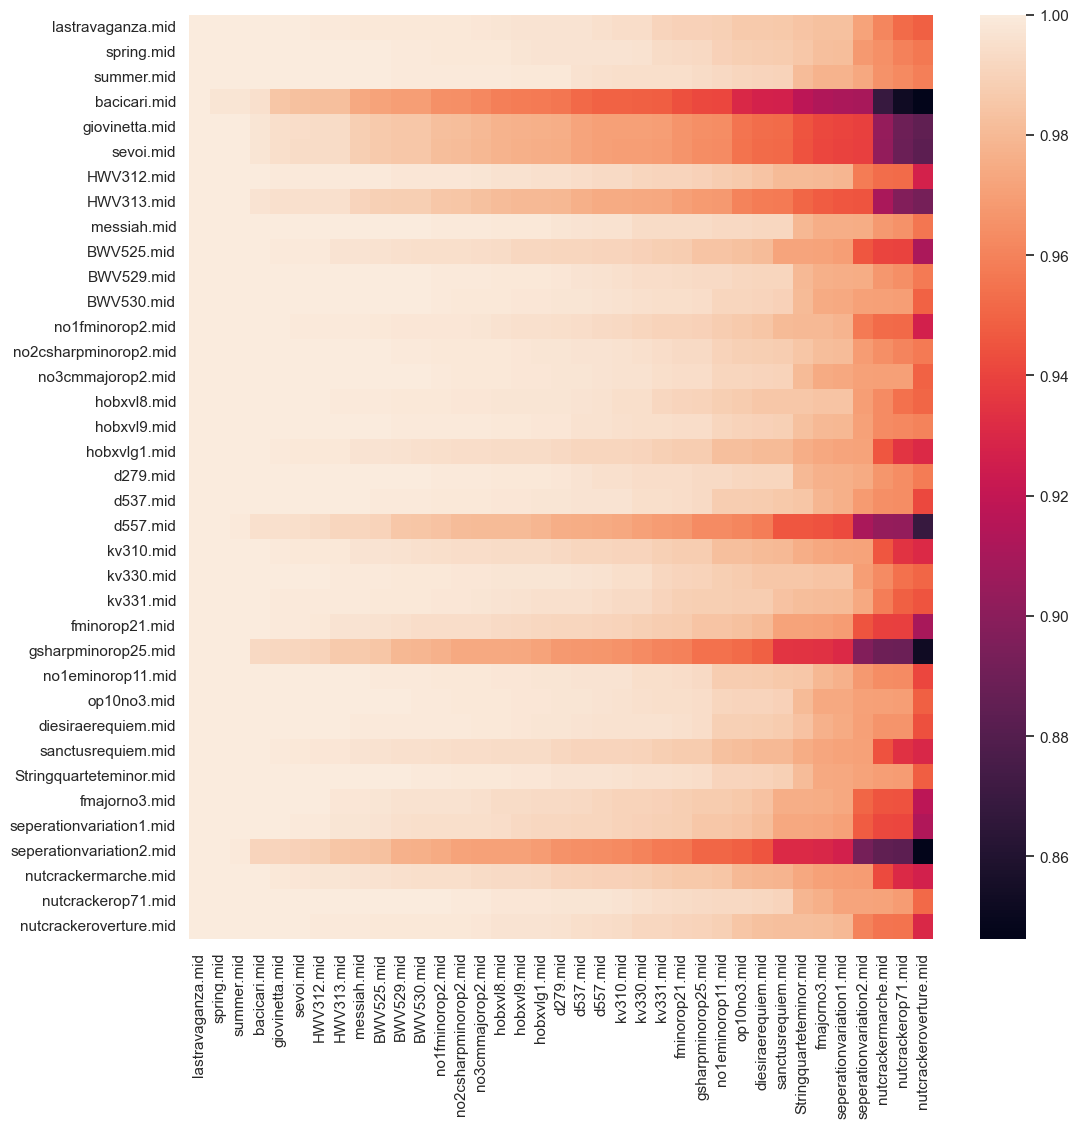

In [8]:
sns.heatmap(total_list, xticklabels = df["midi_name"], yticklabels = df["midi_name"])

In [9]:
for harmonic in df["harmonic_reduction"]:
    print(len(harmonic))

591
533
1184
513
609
365
493
442
756
406
1070
1292
3687
5246
5957
1813
560
1106
2066
2600
1047
899
1813
1443
2586
581
6029
943
1827
906
6442
2042
329
347
590
344
1255


In [10]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
vector = CountVectorizer()

In [12]:
print(vector.fit_transform(df["harmonic_reduction"]).toarray())

[[0 0 0 ... 3 0 0]
 [3 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 ...
 [7 0 0 ... 0 0 0]
 [2 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 4]]


In [13]:
print(vector.vocabulary_)

{'i53': 48, 'v64': 82, 'v53': 80, 'ii6': 57, 'iii65': 67, 'iv65': 76, 'v65': 83, 'iv': 70, 'ii': 53, 'iii': 61, 'iv6': 74, 'iii6': 65, 'i6': 49, 'ii7': 60, 'ii42': 54, 'ii53': 56, 'iv64': 75, 'iv42': 71, 'v42': 78, 'vi42': 86, 'vii64': 98, 'vii42': 94, 'vii': 93, 'iii53': 64, 'vii6': 97, 'vi6': 89, 'v6': 81, 'v7': 84, 'iv53': 73, 'iii42': 62, 'i43': 47, 'i64': 50, 'vi': 85, 'bi': 0, 'bv': 21, 'iv43': 72, 'vi53': 88, 'vi7': 92, 'vi65': 91, 'i42': 46, 'ii43': 55, 'vii7': 100, 'vii65': 99, 'it64': 69, 'iii64': 66, 'i65': 51, 'i7': 52, 'ii65': 59, 'iv7': 77, 'vi43': 87, 'vii53': 96, 'ii64': 58, 'v43': 79, 'iii7': 68, 'vi64': 90, 'vii43': 95, 'iii43': 63, 'bvii6': 41, 'bvii64': 42, 'bvi': 29, 'biii': 13, 'biii65': 19, 'bii': 6, 'bvii53': 40, 'bii53': 9, 'biii42': 14, 'bvii42': 38, 'bvii': 37, 'biii64': 18, 'biii6': 17, 'biii43': 15, 'biii7': 20, 'biii53': 16, 'bvi53': 32, 'bii43': 8, 'bvii43': 39, 'bvi42': 30, 'bvii65': 43, 'bv53': 24, 'bv65': 27, 'bvii7': 44, 'bvi65': 35, 'bii64': 11, 'bii

In [14]:
tfidfv = TfidfVectorizer().fit(df["harmonic_reduction"])

In [15]:
result = tfidfv.transform(df["harmonic_reduction"]).toarray()

In [16]:
result

array([[0.        , 0.        , 0.        , ..., 0.35907804, 0.        ,
        0.        ],
       [0.31593847, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.04489492,
        0.0421275 ],
       ...,
       [0.46622576, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32581102, 0.        , 0.        , ..., 0.        , 0.22980896,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.1645545 ]])

In [17]:
cosine_similarity(result[0].reshape(1,-1), result[1].reshape(1,-1))

array([[0.49905464]])

In [18]:
total_list = []

for y_data in result:
    x_list = []
    for x_data in result:

         x_list.append(cosine_similarity(y_data.reshape(1,-1), x_data.reshape(1,-1))[0][0])
        
    
    total_list.append(x_list)

In [28]:
df["song"] = df['midi_name'].str.replace(pat='.mid', repl='', regex=False)

In [29]:
df

,Unnamed: 0,midi_path,era_name,composer_name,midi_name,key_signature,harmonic_reduction,song
0,0,../Data/Baroque/Antonio Vivaldi/lastravaganza.mid,Baroque,Antonio Vivaldi,lastravaganza.mid,B- major,"['I53', 'I53', 'I53', 'V64', 'V53', 'V53', 'II...",lastravaganza
1,1,../Data/Baroque/Antonio Vivaldi/spring.mid,Baroque,Antonio Vivaldi,spring.mid,E major,"['I53', 'i', 'I', 'I53', 'i', 'I53', 'I', 'I53...",spring
2,2,../Data/Baroque/Antonio Vivaldi/summer.mid,Baroque,Antonio Vivaldi,summer.mid,g minor,"['i53', 'i53', 'V7', 'v', 'i53', 'V53', 'V7', ...",summer
3,3,../Data/Baroque/Claudio Monteverdi/bacicari.mid,Baroque,Claudio Monteverdi,bacicari.mid,g minor,"['V53', 'VI43', 'V53', 'III53', 'I53', '#vi65'...",bacicari
4,4,../Data/Baroque/Claudio Monteverdi/giovinetta.mid,Baroque,Claudio Monteverdi,giovinetta.mid,a minor,"['i', 'i', 'i65', 'VII', 'ii6', 'III', 'V', 'i...",giovinetta
5,5,../Data/Baroque/Claudio Monteverdi/sevoi.mid,Baroque,Claudio Monteverdi,sevoi.mid,g minor,"['I53', 'VII7', 'III', 'V53', 'i53', 'V6', 'iv...",sevoi
6,6,../Data/Baroque/George Frideric Handel/HWV312.mid,Baroque,George Frideric Handel,HWV312.mid,B- major,"['I', 'i42', 'IV', 'ii42', 'ii42', 'vii', 'I42...",HWV312
7,7,../Data/Baroque/George Frideric Handel/HWV313.mid,Baroque,George Frideric Handel,HWV313.mid,B- major,"['I64', 'IV6', 'vii53', 'I64', 'I53', 'V6', 'I...",HWV313
8,8,../Data/Baroque/George Frideric Handel/messiah...,Baroque,George Frideric Handel,messiah.mid,e minor,"['i53', 'i', 'bv', 'III6', 'iv42', 'v6', 'iv',...",messiah
9,9,../Data/Baroque/Johann Sebastian Bach/BWV525.mid,Baroque,Johann Sebastian Bach,BWV525.mid,E- major,"['vi7', '#iii', 'I', 'V', 'ii', '#iii', 'iii7'...",BWV525


<AxesSubplot: >

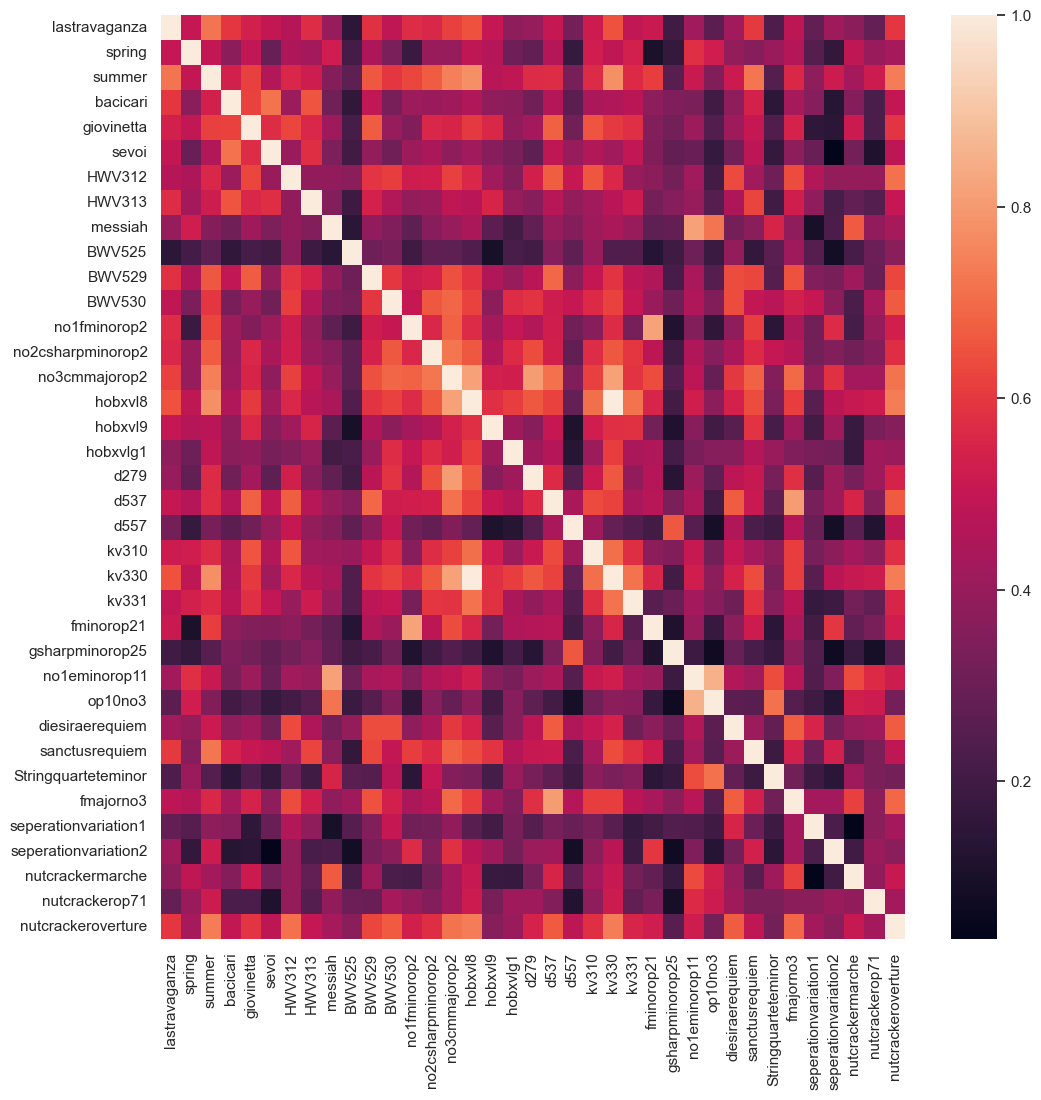

In [30]:
sns.heatmap(total_list, xticklabels = df["song"], yticklabels = df["song"])

## Baroque [0~11] 

- Baroque - 0.4994818230436166
- Classic - 0.4489101725361687
- Romantic - 0.37600361171395025

## Classic [12~23] 

- Baroque - 0.4489101725361687
- Classic - 0.5690261395040306
- Romantic - 0.405404601524667

## Romantic [24~36]

- Baroque - 0.37600361171395025
- Classic - 0.405404601524667
- Romantic - 0.41542135136209346


In [110]:
# Baroque * Baroque

on_Baroque = total_list[:11]

num_list = []

for each_Baroque in on_Baroque:

    num_list.append(sum(each_Baroque[:11]) / len(each_Baroque[:11]))

num_list
result = sum(num_list) / len(num_list)

print(result)

0.4994818230436166


In [108]:
# Baroque * Classic

on_Baroque = total_list[:11]

num_list = []

for each_Baroque in on_Baroque:
#     print(sum(each_Baroque[12:24]) / len(each_Baroque[12:24]))
    num_list.append(sum(each_Baroque[12:24]) / len(each_Baroque[12:24]))

num_list
result = sum(num_list) / len(num_list)

print(result)

0.4489101725361687


In [109]:
# Baroque * Romantic

on_Baroque = total_list[:11]

num_list = []

for each_Baroque in on_Baroque:

    num_list.append(sum(each_Baroque[24:]) / len(each_Baroque[24:]))

num_list
result = sum(num_list) / len(num_list)

print(result)

0.37600361171395025


In [111]:
# Classic * Baroque

on_Baroque = total_list[12:24]

num_list = []

for each_Baroque in on_Baroque:

    num_list.append(sum(each_Baroque[:11]) / len(each_Baroque[:11]))

num_list
result = sum(num_list) / len(num_list)

print(result)

0.4489101725361688


In [112]:
# Classic * Classic

on_Baroque = total_list[12:24]

num_list = []

for each_Baroque in on_Baroque:

    num_list.append(sum(each_Baroque[12:24]) / len(each_Baroque[12:24]))

num_list
result = sum(num_list) / len(num_list)

print(result)

0.5690261395040306


In [113]:
# Classic * Romantic

on_Baroque = total_list[12:24]

num_list = []

for each_Baroque in on_Baroque:

    num_list.append(sum(each_Baroque[24:]) / len(each_Baroque[24:]))

num_list
result = sum(num_list) / len(num_list)

print(result)

0.405404601524667


In [114]:
# Romantic * Baroque

on_Baroque = total_list[24:]

num_list = []

for each_Baroque in on_Baroque:

    num_list.append(sum(each_Baroque[:11]) / len(each_Baroque[:11]))

num_list
result = sum(num_list) / len(num_list)

print(result)

0.37600361171395025


In [115]:
# Romantic * Classic

on_Baroque = total_list[24:]

num_list = []

for each_Baroque in on_Baroque:

    num_list.append(sum(each_Baroque[12:24]) / len(each_Baroque[12:24]))

num_list
result = sum(num_list) / len(num_list)

print(result)

0.405404601524667


In [116]:
# Romantic * Romantic

on_Baroque = total_list[24:]

num_list = []

for each_Baroque in on_Baroque:

    num_list.append(sum(each_Baroque[24:]) / len(each_Baroque[24:]))

num_list
result = sum(num_list) / len(num_list)

print(result)

0.41542135136209346
